Objective:
The objective of this homework assignment is to deepen your understanding of the Word2Vec algorithm, its implementation, and its applications in natural language processing.

#Instructions:

- Implement Word2Vec using the gensim library in Python. You can choose a preprocessed text dataset or use your own.
- Train Word2Vec on the dataset and experiment with different hyperparameters such as window size, vector size, and training epochs.
- Visualize the learned word embeddings using techniques like t-SNE (t-distributed Stochastic Neighbor Embedding) to visualize high-dimensional data in a lower-dimensional space.

#Application Section:

- Choose one or more applications of Word2Vec (e.g., sentiment analysis, document similarity, recommendation systems) and apply the learned word embeddings to solve a relevant problem. You need to find your own data for this task.

- Evaluate the performance of your Word2Vec model on the chosen application(s) and discuss the results.

# Discussion Section:

Reflect on the strengths and weaknesses of Word2Vec. Discuss any limitations or challenges you encountered during the implementation and application of Word2Vec.

#Submission Guidelines:

- Submit your Jupyter Notebook (.ipynb) containing the implementation, results, and discussions.

- Include necessary comments and explanations in your code to ensure clarity.
  Provide clear visualizations and interpretations of your results.

- The submission should be individual work. Any collaboration or external resources used should be properly cited.

#Grading Criteria:
Correct implementation of Word2Vec using gensim: 50%
Effective application of Word2Vec to solve a relevant problem: 30%
Thoughtful discussion on Word2Vec's strengths, weaknesses, and potential improvements: 20%


Embedding for 'example': [ 9.45401989e-05  3.07740690e-03 -6.81256410e-03 -1.37506088e-03
  7.66831636e-03  7.34624360e-03 -3.67307314e-03  2.64320313e-03
 -8.31757765e-03  6.20545540e-03 -4.63707699e-03 -3.16425879e-03
  9.31136403e-03  8.73725978e-04  7.49065029e-03 -6.07430004e-03
  5.16077364e-03  9.92311444e-03 -8.45800247e-03 -5.13627706e-03
 -7.06465496e-03 -4.86252457e-03 -3.77832795e-03 -8.53637140e-03
  7.95610994e-03 -4.84422268e-03  8.42377450e-03  5.26298024e-03
 -6.55055279e-03  3.95777682e-03  5.46991872e-03 -7.42676388e-03
 -7.40543753e-03 -2.47564749e-03 -8.62605032e-03 -1.58170541e-03
 -4.03049809e-04  3.29947704e-03  1.44191808e-03 -8.81674408e-04
 -5.59466239e-03  1.73065183e-03 -8.97819933e-04  6.79364381e-03
  3.97368614e-03  4.52956837e-03  1.43396843e-03 -2.69945408e-03
 -4.36667772e-03 -1.03165093e-03  1.43666589e-03 -2.64585507e-03
 -7.07415771e-03 -7.80545827e-03 -9.12159774e-03 -5.93553204e-03
 -1.84725015e-03 -4.32430767e-03 -6.46100147e-03 -3.71695636e-03


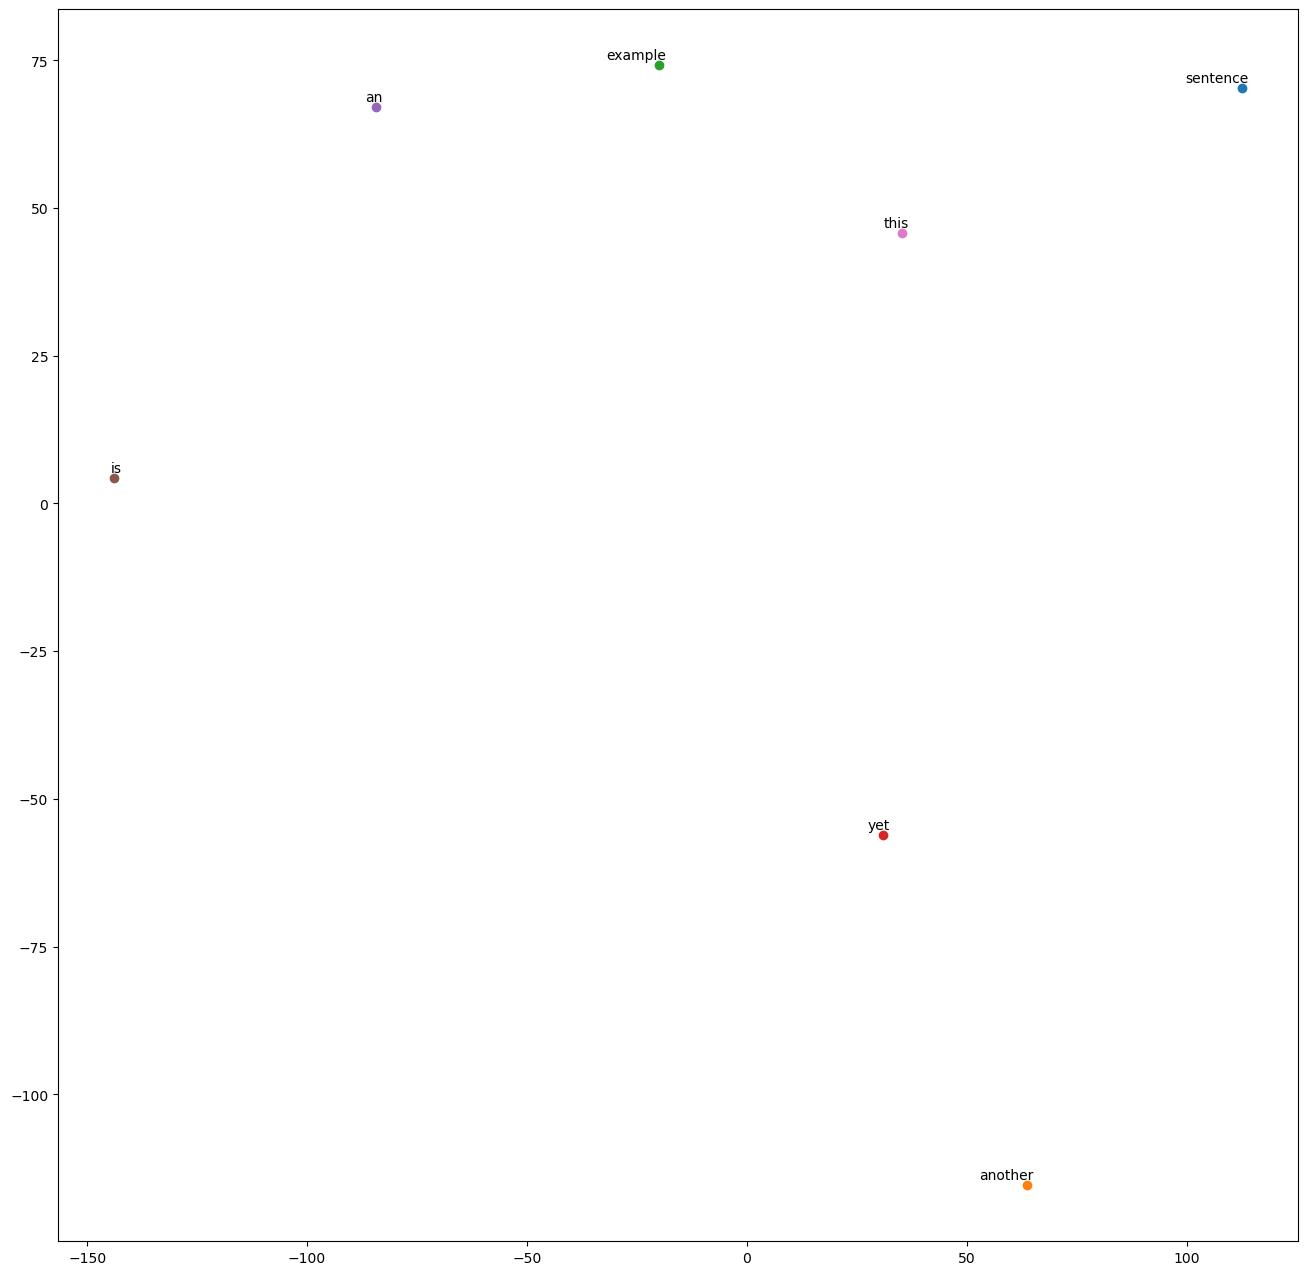

Similarity between 'word1' and 'word2': -0.052298497


In [2]:
# use the following base code to help you in the homework

# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (or use a preprocessed one)
# Example: sentences = [['this', 'is', 'an', 'example', 'sentence'], ['another', 'example', 'sentence']]
# Replace this with your own dataset
sentences = [['this', 'is', 'an', 'example', 'sentence'], [
    'another', 'example', 'sentence'],  ['yet', 'another', 'sentence']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=10)

# Get word embeddings
word_embeddings = model.wv

# Example of accessing word embeddings
print("Embedding for 'example':", word_embeddings['example'])

# Visualize word embeddings using t-SNE


def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in model.wv.key_to_index:
        wordvecs.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=2, n_components=2,
                      init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(wordvecs))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(
            5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()


# Plot t-SNE visualization
tsne_plot(model)

# Example application: similarity between words
similarity = model.wv.similarity('example', 'sentence')
print("Similarity between 'word1' and 'word2':", similarity)

In [13]:

from collections import Counter
import string

In [14]:
class MyWord2Vec():
    def __init__(self, sentences, vector_size=100, window=5, min_count=1):
        self.sentences = sentences
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count

    def train(self, total_examples=None, epochs=None):
        # tokenized_corpus = self._tokenize_corpus(self.sentences)
        tokenized_corpus = self._word_tokenize()
        # vocabulary, word2idx, idx2word = self._build_vocab(tokenized_corpus)
        # unique_words = self._extract_unique_words(tokenized_corpus)
        # return unique_words, vocabulary, word2idx, idx2word
        return tokenized_corpus

    def _word_tokenize(self):
        tokens = []  # List to store the tokens
        current_token = ""  # Variable to store the characters of the current token

        # Iterate through each character in the text
        for char in self.sentences:
            if char not in string.whitespace and char not in string.punctuation:
                # If the character is not whitespace or punctuation, add it to the current token
                current_token += char
            elif current_token:
                # If the current token is not empty, add it to the list of tokens
                tokens.append(current_token)
                current_token = ""  # Reset the current token

        if current_token:
            # Add the last token to the list of tokens if it is not empty
            tokens.append(current_token)

        return tokens

    def _tokenize_corpus(self, corpus):
        tokenized_corpus = [sentence.lower().split() for sentence in corpus]
        return tokenized_corpus

    def _build_vocab(self, tokenized_corpus):
        word_counts = Counter()
        for sentence in tokenized_corpus:
            word_counts.update(sentence)

        vocabulary = [word for word, _ in word_counts.most_common()]
        word2idx = {word: idx for idx, word in enumerate(vocabulary)}
        idx2word = {idx: word for idx, word in enumerate(vocabulary)}

        return vocabulary, word2idx, idx2word

    def _extract_unique_words(self, corpus):
        unique_words = set()

        for sentence in corpus:
            # Tokenize the sentence into words
            words = sentence.split()

            # Add the words to the set of unique words
            unique_words.update(words)

        return unique_words

In [15]:
sentences = [['this', 'is', 'an', 'example', 'sentence'], [
    'another', 'example', 'sentence'],  ['yet', 'another', 'sentence']]

model = MyWord2Vec(sentences)
unique_words, vocabulary, word2idx, idx2word = model.train()
print(unique_words)
print(vocabulary)
print(word2idx)
print(idx2word)

TypeError: 'in <string>' requires string as left operand, not list